Data preparation

In [1]:
# Define the file paths for the input .txt files
file1_path =  r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\amazon_cells_labelled.txt'
file2_path =  r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\imdb_labelled.txt'
file3_path =  r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\yelp_labelled.txt'

# Define the file path for the output combined .txt file
output_file_path = r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\combined.txt'

# Open the first file in read mode with UTF-8 encoding and the output file in write mode with UTF-8 encoding
with open(file1_path, 'r', encoding='utf-8') as file1, open(output_file_path, 'w', encoding='utf-8') as combined_file:
    # Read and write the contents of the first file
    combined_file.write(file1.read())

# Open the second file in read mode with UTF-8 encoding and the output file in append mode with UTF-8 encoding
with open(file2_path, 'r', encoding='utf-8') as file2, open(output_file_path, 'a', encoding='utf-8') as combined_file:
    # Read and append the contents of the second file
    combined_file.write(file2.read())

# Open the third file in read mode with UTF-8 encoding and the output file in append mode with UTF-8 encoding
with open(file3_path, 'r', encoding='utf-8') as file3, open(output_file_path, 'a', encoding='utf-8') as combined_file:
    # Read and append the contents of the third file
    combined_file.write(file3.read())

print("Combination complete. The contents of the three files are combined into 'combined.txt'.")


Combination complete. The contents of the three files are combined into 'combined.txt'.


In [2]:
import csv

# Define the input file path
input_file_path = r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\combined.txt'

# Define the output file path
output_file_path = r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\combined.csv'

# Try reading the data from the input file with different encodings
encodings_to_try = ['utf-8', 'latin-1', 'cp1252']  # Add more encodings as needed

for encoding in encodings_to_try:
    try:
        with open(input_file_path, "r", encoding=encoding) as f:
            lines = f.read().splitlines()
        break  # If successful, exit the loop
    except UnicodeDecodeError:
        continue

# Initialize an empty list to store the data in a CSV format
data = []

# Process each line and split it into the input and label
for line in lines:
    entry = line.split('\t')
    if len(entry) == 2:
        input_text, label = entry
        data.append([input_text, label])

# Write the data to a CSV file
with open(output_file_path, "w", newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    # Write the header row
    writer.writerow(["input", "label"])
    # Write the data rows
    writer.writerows(data)

print(f"Conversion complete. Data saved to {output_file_path}")


Conversion complete. Data saved to C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\combined.csv


Data Visualizations

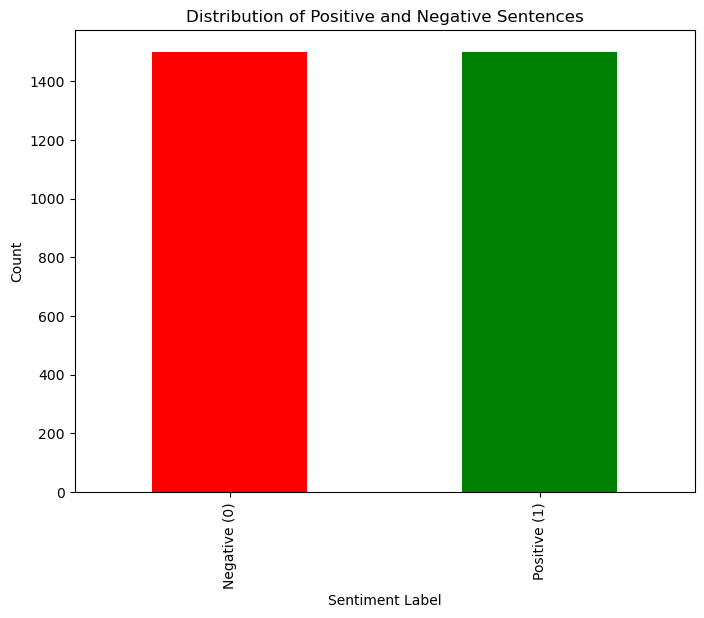

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your dataset
data_path = r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\combined.csv'

# Load the dataset using pandas
df = pd.read_csv(data_path)

# Bar plot to show the distribution of positive and negative sentences
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Positive and Negative Sentences')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'])
plt.show()


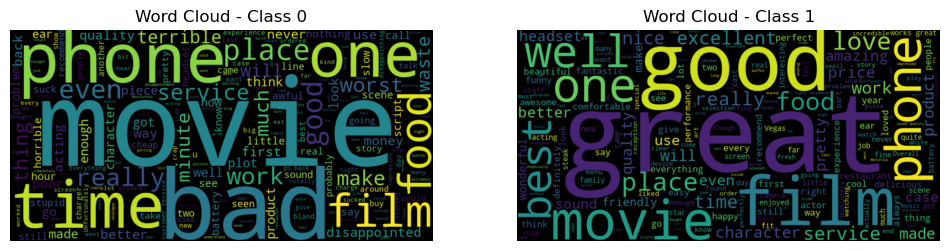

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load the dataset from the given data path
data_path = r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\combined.csv'
data = pd.read_csv(data_path, delimiter=',')

# Separate the data into class 0 and class 1
class_0_data = data[data['label'] == 0]
class_1_data = data[data['label'] == 1]

# Create word clouds for each class
text_class_0 = " ".join(class_0_data['input'])
text_class_1 = " ".join(class_1_data['input'])

wordcloud_class_0 = WordCloud(width=800, height=400).generate(text_class_0)
wordcloud_class_1 = WordCloud(width=800, height=400).generate(text_class_1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_class_0, interpolation='bilinear')
plt.title("Word Cloud - Class 0")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_class_1, interpolation='bilinear')
plt.title("Word Cloud - Class 1")
plt.axis("off")

plt.show()


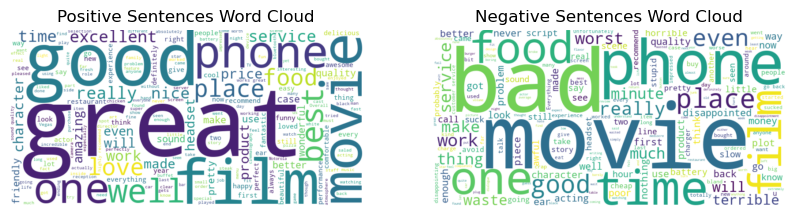

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define the path to your dataset
data_path = r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\combined.csv'

# Load the dataset using pandas
df = pd.read_csv(data_path)

positive_text = ' '.join(df[df['label'] == 1]['input'])
negative_text = ' '.join(df[df['label'] == 0]['input'])

# Create word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentences Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentences Word Cloud')
plt.axis('off')

plt.show()


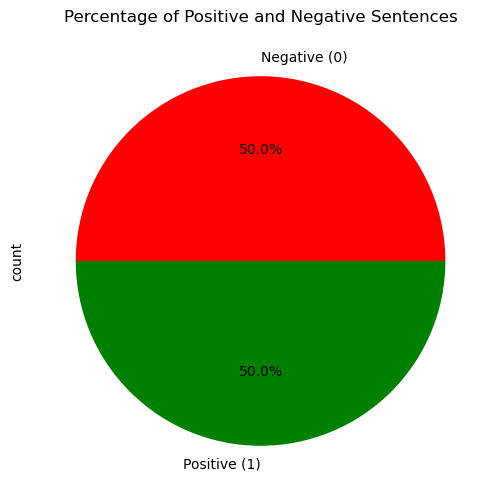

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to your dataset
data_path = r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\combined.csv'

# Load the dataset using pandas
df = pd.read_csv(data_path)

# Pie chart to show the percentage of positive and negative sentences
plt.figure(figsize=(6, 6))
df['label'].value_counts().plot(kind='pie', labels=['Negative (0)', 'Positive (1)'],
                                autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Percentage of Positive and Negative Sentences')
plt.show()


C:\Users\picik\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\picik\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\picik\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\picik\anaconda3\envs\datamining\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

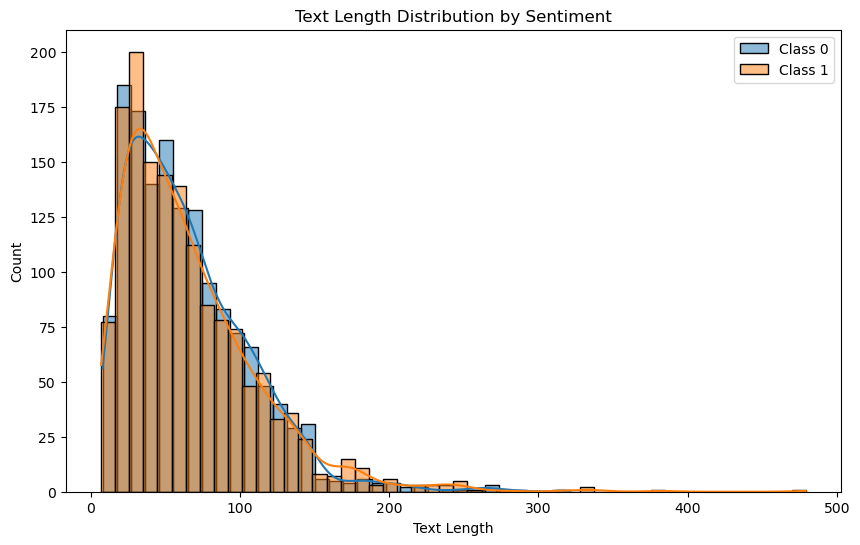

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the given data path
data_path = r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\combined.csv'
data = pd.read_csv(data_path, delimiter=',')

# Separate the data into class 0 and class 1
class_0 = data[data['label'] == 0]
class_1 = data[data['label'] == 1]

# Create a histogram of text length for each class
plt.figure(figsize=(10, 6))
sns.histplot(class_0['input'].str.len(), label='Class 0', kde=True)
sns.histplot(class_1['input'].str.len(), label='Class 1', kde=True)
plt.title("Text Length Distribution by Sentiment")
plt.xlabel("Text Length")
plt.legend()
plt.show()


Building two classification model both using Naive Bayes classifier but with different features i.e. TF-IDF and word frequency feacture. 

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  # Import the matplotlib.pyplot module
import seaborn as sns  # Import the seaborn module


# Load your dataset (assuming 'combined.csv' as the dataset file)
data = pd.read_csv(r'C:\Users\picik\sentiment+labelled+sentences (1)\sentiment labelled sentences\combined.csv', delimiter=',')

# Split the data into features (X) and labels (y)
X = data['input']
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
print(len(X_train))

2400


In [10]:
print(len(X_test))

600


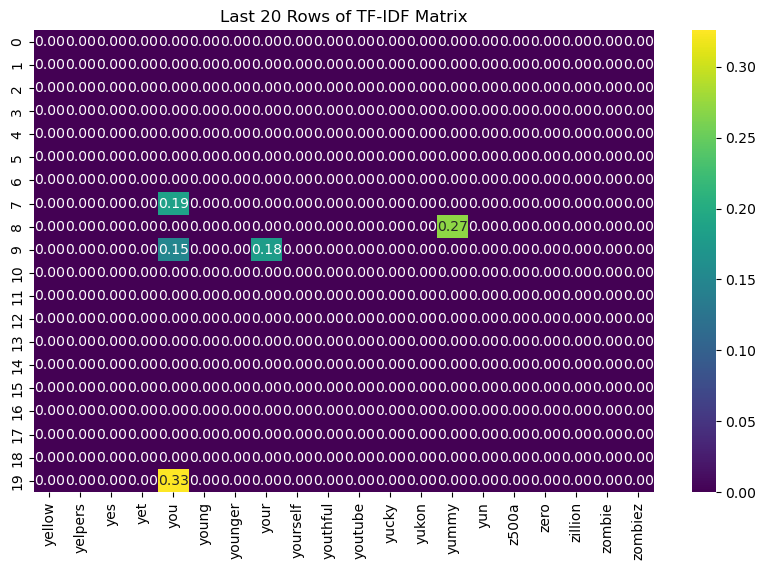

saved sucessfully


In [11]:
#Generate TF-IDF features 
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training text data to obtain TF-IDF features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)


# Transform the testing text data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Get the last 20 rows from the TF-IDF matrix
last_20_rows = X_train_tfidf[-20:, :]

# Get the last 20 terms
feature_names = tfidf_vectorizer.get_feature_names_out()
last_20_terms = feature_names[-20:]

# Create a DataFrame for the last 20 rows and last 20 terms
last_20_rows_df = pd.DataFrame(last_20_rows[-20:, -20:].toarray(), columns=last_20_terms)

# Create a heatmap to visualize the TF-IDF values
plt.figure(figsize=(10, 6))
sns.heatmap(last_20_rows_df, cmap='viridis', annot=True, fmt='.2f')
plt.title('Last 20 Rows of TF-IDF Matrix')
plt.show()

# Save the training TF-IDF matrix to a CSV file
train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=feature_names)
train_tfidf_df.to_csv('train_tfidf.csv', index=False)

# Save the testing TF-IDF matrix to a CSV file
test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=feature_names)
test_tfidf_df.to_csv('test_tfidf.csv', index=False)
print("saved sucessfully")


In [12]:
#Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

# Initialize and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [13]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict labels on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Calculate accuracy and display the classification report and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.8316666666666667
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       299
           1       0.84      0.81      0.83       301

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600

Confusion Matrix:
[[254  45]
 [ 56 245]]


In [14]:
#Generate word frequency features and later classify using Naive Bayes classifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your dataset
data = pd.read_csv('combined.csv', delimiter=',')

# Split the data into features (X) and labels (y)
X = data['input']  # Replace 'text_column' with the appropriate column name
y = data['label']

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CountVectorizer to convert text data into word frequency features
vectorizer = CountVectorizer()
X_train_word_freq = vectorizer.fit_transform(X_train)
X_test_word_freq = vectorizer.transform(X_test)

# Initialize and train a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_word_freq, y_train)

# Predict labels on the test set
y_pred = nb_classifier.predict(X_test_word_freq)

# Calculate accuracy and display the classification report and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.835
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       299
           1       0.85      0.81      0.83       301

    accuracy                           0.83       600
   macro avg       0.84      0.84      0.83       600
weighted avg       0.84      0.83      0.83       600

Confusion Matrix:
[[257  42]
 [ 57 244]]
